In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from scipy.stats import norm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn import svm

from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df0 = pd.read_csv('https://dev.km2.ai/public/parcels_last.csv', low_memory=False) # 1.5 Gb, 2488394 lines, ~3 minutes

# Data Description

In [ ]:
df0.info()
df0.shape
df0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485732 entries, 0 to 2485731
Data columns (total 55 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   ZIPcode                      object 
 2   TaxRateArea_CITY             object 
 3   AIN                          int64  
 4   RollYear                     int64  
 5   TaxRateArea                  int64  
 6   AssessorID                   object 
 7   PropertyLocation             object 
 8   PropertyType                 object 
 9   PropertyUseCode              object 
 10  GeneralUseType               object 
 11  SpecificUseType              object 
 12  SpecificUseDetail1           object 
 13  SpecificUseDetail2           object 
 14  totBuildingDataLines         int64  
 15  YearBuilt                    int64  
 16  EffectiveYearBuilt           int64  
 17  SQFTmain                     int64  
 18  Bedrooms                     int64  
 19  

,id,ZIPcode,TaxRateArea_CITY,AIN,RollYear,TaxRateArea,AssessorID,PropertyLocation,PropertyType,PropertyUseCode,...,UnitNo,City,ZIPcode5,rowID,CENTER_LAT,CENTER_LON,Location1,geo,RecordingDateYear,zip2
0,6985,,PALOS VERDES EST,7545002900,2012,7112,7545-002-900,NaN,OTH,8800,...,,,NaN,20127545002900,33.794278,-118.385681,"(33.79427793, -118.385681)",bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x...,1967,NaN
1,7066,,PALOS VERDES EST,7545002010,2013,7112,7545-002-010,NaN,VAC,010V,...,,,NaN,20137545002010,0.000000,0.000000,NaN,bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x...,2012,NaN
2,7432,,PALOS VERDES EST,7545002011,2013,7112,7545-002-011,NaN,VAC,010V,...,,,NaN,20137545002011,0.000000,0.000000,NaN,bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x...,2012,NaN
3,7792,90274,PALOS VERDES EST,7545009022,2008,7112,7545-009-022,1108 VIA NOGALES PALOS VERDES EST CA 90274,VAC,010V,...,,PALOS VERDES EST CA,90274.0,20087545009022,33.791150,-118.393489,"(33.79114981, -118.3934893)",bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x...,2005,90274.0
4,9019,90274,PALOS VERDES EST,7545017001,2006,7112,7545-017-001,2300 VIA FERNANDEZ PALOS VERDES EST CA 90274,SFR,0101,...,,PALOS VERDES EST CA,90274.0,20067545017001,33.790895,-118.390947,"(33.79089535, -118.39094711)",bytearray(b'\x00\x00\x00\x00\x01\x01\x00\x00\x...,1994,90274.0


# Processing

In [ ]:
df=df0.drop(columns=['AIN','PropertyLocation','PropertyUseCode','SpecificUseDetail1','SpecificUseDetail1','ParcelBoundaryDescription','StreetDirection','ZIPcode5',
'HouseNo','HouseFraction','StreetName','UnitNo','City','rowID','Location1','geo','RecordingDateYear','zip2','ZIPcode','SpecificUseDetail2','SpecialParcelClassification'])
df.shape
df.isnull().any() 
df.isnull().sum()

id                              0
TaxRateArea_CITY                0
RollYear                        0
TaxRateArea                     0
AssessorID                      0
PropertyType                 6026
GeneralUseType                  5
SpecificUseType              1005
totBuildingDataLines            0
YearBuilt                       0
EffectiveYearBuilt              0
SQFTmain                        0
Bedrooms                        0
Bathrooms                       0
Units                           0
RecordingDate                   0
LandValue                       0
LandBaseYear                    0
ImprovementValue                0
ImpBaseYear                     0
TotalLandImpValue               0
HomeownersExemption             0
RealEstateExemption             0
FixtureValue                    0
FixtureExemption                0
PersonalPropertyValue           0
PersonalPropertyExemption       0
isTaxableParcel                 0
TotalValue                      0
TotalExemption

In [ ]:
df1=df
df1['PropertyType'].fillna(df1['PropertyType'].mode()[0], inplace=True)
df1['GeneralUseType'].fillna(df1['GeneralUseType'].mode()[0], inplace=True)
df1['SpecificUseType'].fillna(df1['SpecificUseType'].mode()[0], inplace=True)
df1.AdministrativeRegion=df1.AdministrativeRegion.fillna(method='ffill')
df1.isnull().sum()

id                           0
TaxRateArea_CITY             0
RollYear                     0
TaxRateArea                  0
AssessorID                   0
PropertyType                 0
GeneralUseType               0
SpecificUseType              0
totBuildingDataLines         0
YearBuilt                    0
EffectiveYearBuilt           0
SQFTmain                     0
Bedrooms                     0
Bathrooms                    0
Units                        0
RecordingDate                0
LandValue                    0
LandBaseYear                 0
ImprovementValue             0
ImpBaseYear                  0
TotalLandImpValue            0
HomeownersExemption          0
RealEstateExemption          0
FixtureValue                 0
FixtureExemption             0
PersonalPropertyValue        0
PersonalPropertyExemption    0
isTaxableParcel              0
TotalValue                   0
TotalExemption               0
netTaxableValue              0
AdministrativeRegion         0
Cluster 

In [ ]:
#convert categorical to numeric 
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
df1['PropertyType']=class_le.fit_transform(df1['PropertyType'].values)
df1['GeneralUseType']=class_le.fit_transform(df1['GeneralUseType'].values)
df1['SpecificUseType']=class_le.fit_transform(df1['SpecificUseType'].values)
df1['HomeownersExemption']=class_le.fit_transform(df1['HomeownersExemption'].values)
df1['FixtureValue']=class_le.fit_transform(df1['FixtureValue'].values)
df1['FixtureExemption']=class_le.fit_transform(df1['FixtureExemption'].values)
df1['PersonalPropertyValue']=class_le.fit_transform(df1['PersonalPropertyValue'].values)
df1['PersonalPropertyExemption']=class_le.fit_transform(df1['PersonalPropertyExemption'].values)
df1['isTaxableParcel']=class_le.fit_transform(df1['isTaxableParcel'].values)
df1['TotalExemption']=class_le.fit_transform(df1['TotalExemption'].values)
df1['TaxRateArea_CITY']=class_le.fit_transform(df1['TaxRateArea_CITY'].values)
df1['AdministrativeRegion']=class_le.fit_transform(df1['AdministrativeRegion'].values)


In [ ]:
import re
df1['AssessorID'] = df1['AssessorID'].apply(lambda x: re.sub('-', '', x))

In [ ]:
df1['AssessorID']=df1['AssessorID'].apply(int)

In [ ]:
# convert to dummy variables
df1['HomeownersExemption'] = list(map(lambda x : 0 if x==0 else 1, df1['HomeownersExemption']))
df1['RealEstateExemption'] = list(map(lambda x : 0 if x==0.0 else 1, df1['RealEstateExemption']))
df1['FixtureValue'] = list(map(lambda x : 0 if x==0.0 else 1, df1['FixtureValue']))
df1['FixtureExemption'] = list(map(lambda x : 0 if x==0.0 else 1, df1['FixtureExemption']))
df1['PersonalPropertyValue'] = list(map(lambda x : 0 if x==0.0 else 1, df1['PersonalPropertyValue']))
df1['PersonalPropertyExemption'] = list(map(lambda x : 0 if x==0.0 else 1, df1['PersonalPropertyExemption']))
df1['isTaxableParcel'] = list(map(lambda x : 0 if x==0.0 else 1, df1['isTaxableParcel']))
df1['TotalExemption'] = list(map(lambda x : 0 if x==0.0 else 1, df1['TotalExemption']))


In [ ]:
df1.describe()

,id,TaxRateArea_CITY,RollYear,TaxRateArea,AssessorID,PropertyType,GeneralUseType,SpecificUseType,totBuildingDataLines,YearBuilt,...,PersonalPropertyValue,PersonalPropertyExemption,isTaxableParcel,TotalValue,TotalExemption,netTaxableValue,AdministrativeRegion,Cluster,CENTER_LAT,CENTER_LON
count,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,...,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06,2.485732e+06
mean,8.876732e+06,8.913416e+01,2.020737e+03,4.314631e+03,5.278200e+09,4.319811e+00,8.344002e+00,5.541246e+01,9.815978e-01,1.752748e+03,...,2.242277e-02,9.775792e-04,9.752202e-01,7.539432e+05,4.003533e-01,7.239366e+05,8.587595e+00,8.722928e+03,3.403406e+01,-1.180231e+02
std,2.841717e+06,3.677154e+01,1.683845e+00,4.205380e+03,2.078395e+09,1.381171e+00,1.900591e+00,1.543889e+01,4.936494e-01,6.031198e+02,...,1.480540e-01,3.125098e-02,1.554535e-01,4.969013e+06,4.899700e-01,4.287993e+06,6.015149e+00,6.767808e+03,1.486651e+00,5.102934e+00
min,6.985000e+03,0.000000e+00,2.006000e+03,4.000000e+00,2.004001e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.189403e+02
25%,7.915089e+06,8.200000e+01,2.021000e+03,6.700000e+01,3.153095e+09,4.000000e+00,9.000000e+00,6.200000e+01,1.000000e+00,1.936000e+03,...,0.000000e+00,0.000000e+00,1.000000e+00,1.858418e+05,0.000000e+00,1.788670e+05,4.000000e+00,3.182000e+03,3.395468e+01,-1.183936e+02
50%,8.536522e+06,8.400000e+01,2.021000e+03,3.449000e+03,5.347020e+09,5.000000e+00,9.000000e+00,6.200000e+01,1.000000e+00,1.954000e+03,...,0.000000e+00,0.000000e+00,1.000000e+00,3.697730e+05,0.000000e+00,3.638260e+05,7.000000e+00,7.199000e+03,3.406757e+01,-1.182556e+02
75%,9.157954e+06,1.200000e+02,2.021000e+03,7.500000e+03,7.206023e+09,5.000000e+00,9.000000e+00,6.200000e+01,1.000000e+00,1.975000e+03,...,0.000000e+00,0.000000e+00,1.000000e+00,6.486790e+05,1.000000e+00,6.414198e+05,1.100000e+01,1.140300e+04,3.417697e+01,-1.181060e+02
max,4.042959e+07,1.440000e+02,2.021000e+03,1.696800e+04,8.765025e+09,6.000000e+00,9.000000e+00,7.800000e+01,5.000000e+00,2.021000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.309529e+09,1.000000e+00,1.067449e+09,2.200000e+01,3.099900e+04,3.482305e+01,0.000000e+00


In [ ]:
df1.head()

,id,TaxRateArea_CITY,RollYear,TaxRateArea,AssessorID,PropertyType,GeneralUseType,SpecificUseType,totBuildingDataLines,YearBuilt,...,PersonalPropertyValue,PersonalPropertyExemption,isTaxableParcel,TotalValue,TotalExemption,netTaxableValue,AdministrativeRegion,Cluster,CENTER_LAT,CENTER_LON
0,6985,100,2012,7112,7545002900,3,7,27,0,0,...,0,0,0,0.0,0,0.0,11,14163,33.794278,-118.385681
1,7066,100,2013,7112,7545002010,6,9,62,0,0,...,0,0,1,3572000.0,0,3572000.0,11,14163,0.000000,0.000000
2,7432,100,2013,7112,7545002011,6,9,62,0,0,...,0,0,1,123000.0,0,123000.0,11,14163,0.000000,0.000000
3,7792,100,2008,7112,7545009022,6,9,62,0,0,...,0,0,1,2002216.0,0,2002216.0,11,14163,33.791150,-118.393489
4,9019,100,2006,7112,7545017001,5,9,62,1,1956,...,0,0,1,651434.0,1,644434.0,11,14163,33.790895,-118.390947


In [ ]:
df2 = df1[(df1['EffectiveYearBuilt'] >0) & (df1['LandValue'] >0) & (df1['TotalValue']>0)]
df2.shape

(2215917, 35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b894d57d0>,
      dtype=object)

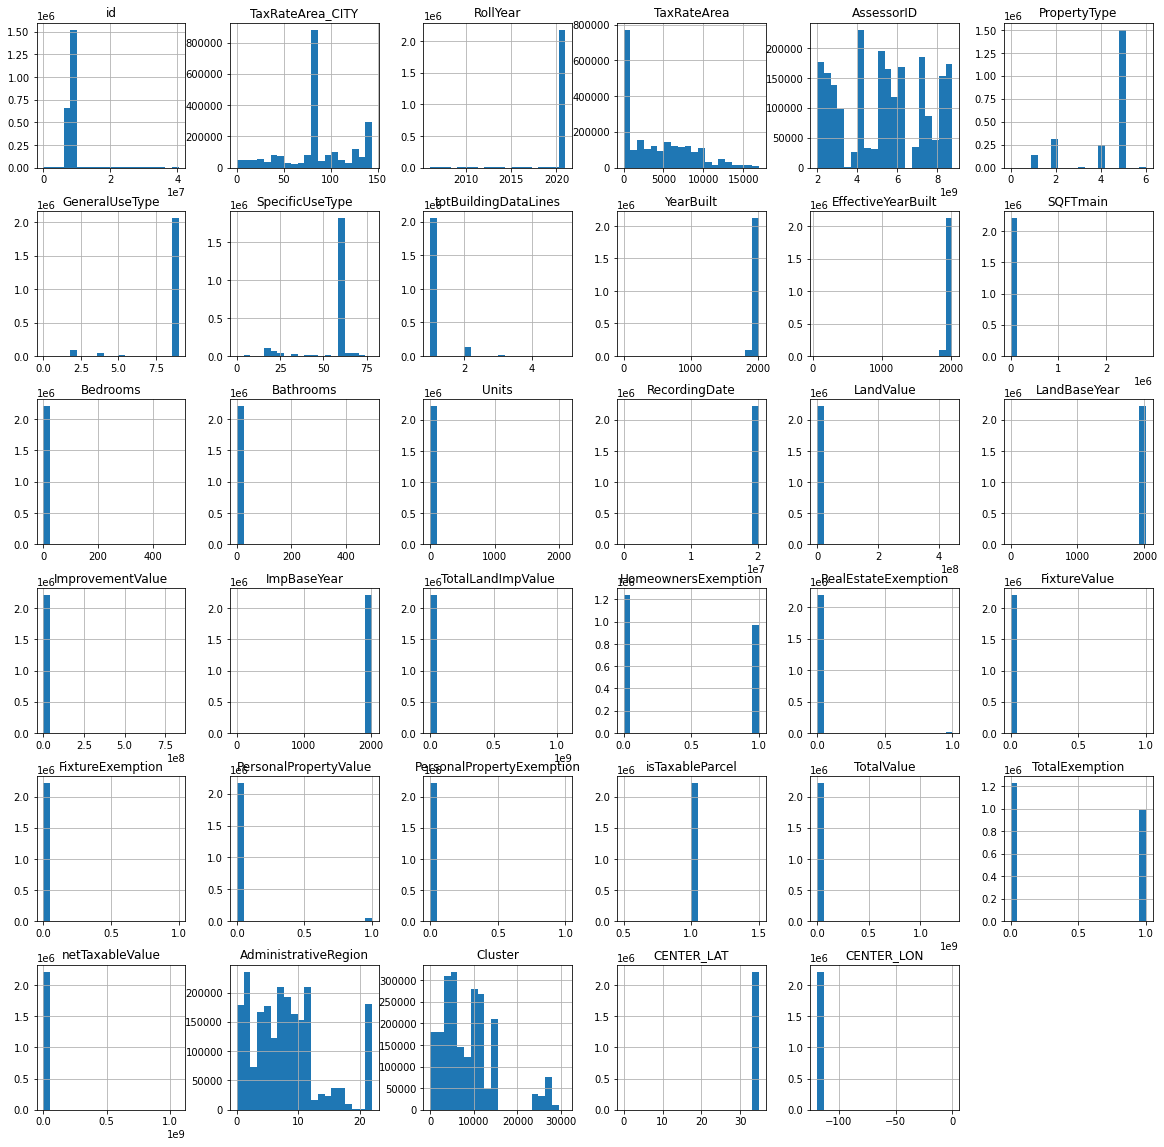

In [ ]:
df2.hist(figsize=(20,20), bins=20)

# Data Scale

In [ ]:
X_dataframe = df2.drop('TotalValue', 1)
Y_dataframe = df2[["TotalValue"]]


scaler_X = preprocessing.StandardScaler().fit(X_dataframe)
X = scaler_X.transform(X_dataframe)
scaler_Y = preprocessing.StandardScaler().fit(Y_dataframe)
Y = scaler_Y.transform(Y_dataframe)

# Model Selection_CV_takes too long time(不用提到)

In [ ]:
def score_test(model,X,Y):
    score = cross_val_score(model, X, Y, cv=5)
    return score

In [ ]:
def rmse_test(model,X,Y):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [ ]:
models = [LinearRegression(),Lasso(alpha=0.01,max_iter=10000),Ridge(),ElasticNet(alpha=0.001,max_iter=10000),
          svm.SVR(),RandomForestRegressor(),BaggingRegressor(),AdaBoostRegressor()]

In [ ]:
names = ["LR", "Lasso", "Ridge", "Ela", "SVR", "RF", "Bag", "Boost"]
for name, model in zip(names, models):
    score = score_test(model, X, Y)
    rmse = rmse_test(model, X, Y)
    print("{}: {:.6f}, {:.6f}, {:.6f}, {:.6f}".format(name, score.mean(),score.std(), rmse.mean(), rmse.std()))

LR: 0.943538, 0.017646, 0.000872, 0.000277
Lasso: -0.003239, 0.004693, 0.003738, 0.000998
Ridge: 0.944165, 0.018183, 0.000871, 0.000290
Ela: -0.003239, 0.004693, 0.003738, 0.000998
SVR: -578.094471, 373.271793, 0.078345, 0.004116


KeyboardInterrupt: ignored

# Model Selection_train & test

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(321)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4)

print(X_train.shape)
print(Y_train.shape)

(1329550, 34)
(1329550, 1)


## Model Parameter Adjusting

In [ ]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

## Lasso Regression

In [ ]:
param_grid={'alpha': [0.002,0.005,0.01],'max_iter':[10000]}
grid(Lasso()).grid_get(X,Y,param_grid)

{'alpha': 0.01, 'max_iter': 10000} 0.23371747637905627
                                params  mean_test_score  std_test_score
0  {'alpha': 0.002, 'max_iter': 10000}         0.234811        0.033362
1  {'alpha': 0.005, 'max_iter': 10000}         0.233828        0.033721
2   {'alpha': 0.01, 'max_iter': 10000}         0.233717        0.033944


alpha = 0.01, max_iter = 10000

## Ridge Regression

In [ ]:
param_grid={'alpha': [100,150,200]}
grid(Ridge()).grid_get(X,Y,param_grid)

{'alpha': 200} 0.23645647927487068
           params  mean_test_score  std_test_score
0  {'alpha': 100}         0.236467        0.033236
1  {'alpha': 150}         0.236461        0.033236
2  {'alpha': 200}         0.236456        0.033237


alpha = 200

## ElasticNet_takes too long time

In [ ]:
param_grid={'alpha':[0.001,0.005],'l1_ratio':[0.1,0.5,0.7],'max_iter':[10000]}
grid(ElasticNet()).grid_get(X,Y,param_grid)

KeyboardInterrupt: ignored

## SVM_takes too long time

In [ ]:
param_grid={'C':[5,15],'kernel':["rbf","linear","poly"],"gamma":[0.0005,0.0010],"epsilon":[0.005,0.010]}
grid(svm.SVR()).grid_get(X,Y,param_grid)

## Random Forest_takes too long time

In [ ]:
param_grid={}
grid(RandomForestRegressor()).grid_get(X,Y,param_grid)

## Model Summary

In [ ]:
def score_test2(model,X_train, Y_train,X_test, Y_test):
    model_here = model.fit(X_train, Y_train)
    score = model_here.score(X_test, Y_test)
    return score

In [ ]:
models = [LinearRegression(),Lasso(alpha=0.01,max_iter=10000),Ridge(alpha = 200),ElasticNet(alpha=0.001,max_iter=10000),
          BaggingRegressor(),AdaBoostRegressor()]

In [ ]:
names = ["LR", "Lasso", "Ridge", "Ela", "Bag", "Boost"]
for name, model in zip(names, models):
    score = score_test2(model, X_train, Y_train,X_test, Y_test)
    print("{}:{:.6f}".format(name, score))

LR:0.967709
Lasso:0.968336
Ridge:0.967792
Ela:0.967821
Bag:0.966817
Boost:0.084193


# Analysis

In [ ]:
model_final = Lasso(alpha=0.01,max_iter=10000)
model_final.fit(X_train, Y_train)
Y_pred = model_final.predict(X_test)

In [ ]:
X_test_ori = scaler_X.inverse_transform(X_test)
result = pd.DataFrame(X_test_ori)
result.columns = X_dataframe.columns.values.tolist()

In [ ]:
Y_test_ori = scaler_Y.inverse_transform(Y_test)
result['Y_test'] = pd.DataFrame(Y_test_ori)

In [ ]:
result['Y_true'] = pd.DataFrame(Y_test)
result['Y_pred'] = pd.DataFrame(Y_pred)
result['error'] = result['Y_true']-result['Y_pred']

In [ ]:
result.describe()

,id,TaxRateArea_CITY,RollYear,TaxRateArea,AssessorID,PropertyType,GeneralUseType,SpecificUseType,totBuildingDataLines,YearBuilt,...,TotalExemption,netTaxableValue,AdministrativeRegion,Cluster,CENTER_LAT,CENTER_LON,Y_test,Y_true,Y_pred,error
count,8.863670e+05,886367.000000,886367.000000,886367.000000,8.863670e+05,886367.000000,886367.000000,886367.000000,886367.000000,886367.000000,...,886367.000000,8.863670e+05,886367.000000,886367.000000,886367.000000,8.863670e+05,8.863670e+05,886367.000000,886367.000000,886367.000000
mean,8.715342e+06,87.108315,2020.878774,4148.511927,5.363674e+09,4.205663,8.565761,56.907254,1.092695,1955.560186,...,0.447463,7.680372e+05,7.996841,8648.045112,34.054757,-1.181771e+02,7.993540e+05,-0.000495,-0.000277,-0.000218
std,2.101032e+06,36.009652,1.136881,4104.073620,2.082478e+09,1.330733,1.625542,13.892352,0.384314,96.716507,...,0.497232,4.341948e+06,5.557774,6273.514394,0.853235,2.889956e+00,4.982083e+06,0.983678,0.976612,0.175040
min,9.019000e+03,0.000000,2006.000000,4.000000,2.004001e+09,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.189204e+02,9.000000e+00,-0.158320,-0.202843,-10.983323
25%,7.932664e+06,82.000000,2021.000000,67.000000,3.209010e+09,4.000000,9.000000,62.000000,1.000000,1946.000000,...,0.000000,2.263810e+05,4.000000,3491.000000,33.946572,-1.183952e+02,2.327400e+05,-0.112369,-0.112142,-0.001022
50%,8.570216e+06,84.000000,2021.000000,3267.000000,5.435028e+09,5.000000,9.000000,62.000000,1.000000,1956.000000,...,0.000000,4.009000e+05,7.000000,7423.000000,34.058052,-1.182605e+02,4.070730e+05,-0.077948,-0.078094,0.000248
75%,9.158184e+06,110.000000,2021.000000,7290.000000,7.244011e+09,5.000000,9.000000,62.000000,1.000000,1979.000000,...,1.000000,6.749920e+05,10.000000,11167.000000,34.164378,-1.181114e+02,6.820000e+05,-0.023666,-0.024628,0.001888
max,4.042364e+07,144.000000,2021.000000,16964.000000,8.765024e+09,6.000000,9.000000,78.000000,5.000000,2021.000000,...,1.000000,1.067449e+09,22.000000,30893.000000,34.819663,1.421085e-14,1.067449e+09,210.602217,221.585540,105.831545


In [ ]:
undervalued = result.sort_values('error', ascending=False).head(100)

In [ ]:
undervalued.describe()

,id,TaxRateArea_CITY,RollYear,TaxRateArea,AssessorID,PropertyType,GeneralUseType,SpecificUseType,totBuildingDataLines,YearBuilt,...,TotalExemption,netTaxableValue,AdministrativeRegion,Cluster,CENTER_LAT,CENTER_LON,Y_test,Y_true,Y_pred,error
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,1.230234e+07,77.650000,2018.240000,5398.450000,6.008694e+09,1.910000,4.450000,33.540000,3.710000,1960.360000,...,0.440000,5.276860e+07,16.630000,26889.880000,33.720378,-1.170298e+02,1.446157e+08,28.395065,20.526370,7.868695
std,8.370089e+06,39.124349,4.539657,4440.850861,1.840422e+09,1.189983,1.961112,16.131668,1.609912,26.818326,...,0.498888,9.952518e+07,3.186636,5035.459046,3.408487,1.182327e+01,1.674538e+08,33.062608,27.046900,13.726815
min,2.755770e+05,3.000000,2006.000000,5.000000,2.320001e+09,0.000000,0.000000,1.000000,1.000000,1897.000000,...,0.000000,0.000000e+00,3.000000,4423.000000,0.000000,-1.187210e+02,1.056503e+07,1.927671,1.068166,0.682202
25%,8.348601e+06,43.500000,2016.000000,1239.750000,4.452013e+09,1.000000,4.000000,26.750000,2.000000,1945.000000,...,0.000000,9.540000e+02,16.000000,26819.500000,34.007020,-1.183762e+02,3.052189e+07,5.868015,2.918247,1.000195
50%,8.966574e+06,84.000000,2021.000000,5066.500000,5.627018e+09,1.000000,4.000000,30.000000,5.000000,1960.000000,...,0.000000,1.515314e+07,18.000000,28616.500000,34.062295,-1.182338e+02,7.931859e+07,15.502589,9.939266,2.069979
75%,9.637524e+06,104.000000,2021.000000,8910.750000,8.061515e+09,3.000000,5.000000,42.000000,5.000000,1978.000000,...,1.000000,6.865443e+07,18.000000,28748.000000,34.104009,-1.180491e+02,1.676024e+08,32.933613,22.538465,9.051066
max,3.969318e+07,144.000000,2021.000000,13923.000000,8.628003e+09,5.000000,9.000000,74.000000,5.000000,2017.000000,...,1.000000,6.548332e+08,20.000000,30893.000000,34.695355,1.421085e-14,9.219420e+08,181.872807,151.834962,105.831545


In [ ]:
undervalued[undervalued['error']>10]

,id,TaxRateArea_CITY,RollYear,TaxRateArea,AssessorID,PropertyType,GeneralUseType,SpecificUseType,totBuildingDataLines,YearBuilt,...,TotalExemption,netTaxableValue,AdministrativeRegion,Cluster,CENTER_LAT,CENTER_LON,Y_test,Y_true,Y_pred,error
222991,8392371.0,84.0,2021.0,5.0,5.151004e+09,3.0,7.0,50.0,1.0,2015.0,...,1.0,0.0,19.0,29686.0,34.054455,-1.182508e+02,598007573.0,117.914168,12.082623,105.831545
56093,30278440.0,108.0,2018.0,7790.0,8.362011e+09,0.0,0.0,1.0,5.0,1913.0,...,1.0,9692457.0,18.0,28748.0,0.000000,1.421085e-14,386854362.0,76.223416,30.456574,45.766842
150030,2836024.0,63.0,2014.0,2077.0,8.533009e+09,1.0,4.0,23.0,5.0,1978.0,...,0.0,376835336.0,19.0,29885.0,34.124975,-1.179384e+02,376835336.0,74.245229,31.179755,43.065474
352108,13789459.0,108.0,2017.0,7790.0,8.362011e+09,3.0,5.0,30.0,5.0,1913.0,...,1.0,4280000.0,18.0,28748.0,34.077092,-1.177506e+02,355645750.0,70.061490,28.013748,42.047742
652350,23213086.0,84.0,2011.0,67.0,4.416005e+09,1.0,8.0,4.0,4.0,1972.0,...,1.0,0.0,19.0,29686.0,34.044644,-1.185655e+02,483389705.0,95.283657,63.893030,31.390627
291839,8612454.0,84.0,2021.0,8827.0,5.542016e+09,3.0,5.0,30.0,5.0,1963.0,...,1.0,738975.0,18.0,28745.0,34.097540,-1.182901e+02,921942047.0,181.872807,151.834962,30.037845
236544,17094164.0,19.0,2010.0,2530.0,2.484025e+09,3.0,5.0,30.0,5.0,1953.0,...,1.0,0.0,18.0,28742.0,34.156008,-1.183283e+02,369724211.0,72.841186,46.419164,26.422022
325853,8275700.0,84.0,2021.0,67.0,4.416005e+09,3.0,7.0,27.0,5.0,1950.0,...,1.0,345612.0,19.0,29686.0,34.046472,-1.185639e+02,511381791.0,100.810502,76.186714,24.623788
527908,9582311.0,40.0,2021.0,12730.0,8.533005e+09,3.0,5.0,30.0,5.0,1985.0,...,1.0,0.0,18.0,28748.0,34.130022,-1.179710e+02,414355428.0,81.653313,59.303922,22.349391
134330,21360168.0,44.0,2013.0,9851.0,4.138008e+09,1.0,2.0,42.0,5.0,1963.0,...,0.0,181132272.0,13.0,23698.0,33.914009,-1.183810e+02,181132272.0,35.605002,15.599154,20.005848
